In [3]:
import torch
import pandas as pd
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

***Data processing for model training***


In [4]:
data=pd.read_csv("/content/sample_data/mnist_train_small.csv").values

In [5]:
data.shape

(19999, 785)

In [6]:
x_train=data[:,1:]

In [7]:
x_train.shape
x_train=x_train.astype(np.float32)

In [8]:
x_train=x_train.reshape(len(x_train),28,28)

In [9]:
y_train=data[:,0]

7


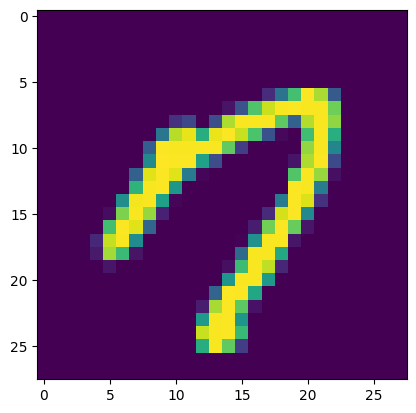

In [10]:
plt.imshow(x_train[1,:])
print(y_train[1])

***some cuda functions ***

In [11]:
torch.cuda.is_available()

True

In [12]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [13]:
x_train=x_train.reshape(len(x_train),1,28,28)

In [14]:
x_train.shape

(19999, 1, 28, 28)

In [15]:
x_tensor=torch.from_numpy(x_train)

In [16]:
x_tensor=x_tensor/255.0

In [17]:
x_tensor.cuda()

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [18]:
y_tensor=torch.from_numpy(y_train)


In [19]:
y_tensor.cuda()

tensor([5, 7, 9,  ..., 2, 9, 5], device='cuda:0')

***creating model***

In [20]:
class Model(torch.nn.Module):
  def __init__(self):
    super(Model,self).__init__()
    self.c1=torch.nn.Conv2d(in_channels=1,out_channels=5, kernel_size=2, stride=2,padding=1)
    self.max=torch.nn.MaxPool2d(kernel_size=(2,2),stride=2)
    self.c2=torch.nn.Conv2d(in_channels=5,out_channels=3,kernel_size=3,stride=1,padding=1)
    self.flat=torch.nn.Flatten()
    self.l1=torch.nn.Linear(in_features=147,  out_features=36)
    self.l2=torch.nn.Linear(in_features=36,out_features=10)

  def forward(self,x):
    x=self.flat(self.c2(self.max(self.c1(x))))
    x=F.relu(self.l1(x))
    x=self.l2(x)
    return F.sigmoid(x)


In [21]:
model=Model().cuda()

In [22]:
model.cuda

<bound method Module.cuda of Model(
  (c1): Conv2d(1, 5, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
  (max): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (c2): Conv2d(5, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (flat): Flatten(start_dim=1, end_dim=-1)
  (l1): Linear(in_features=147, out_features=36, bias=True)
  (l2): Linear(in_features=36, out_features=10, bias=True)
)>

***training loop***

In [30]:
epoches=500
loss=torch.nn.CrossEntropyLoss()
optim=torch.optim.Adam(model.parameters(),lr=0.01)

In [24]:
x_tensor, y_tensor = x_tensor.cuda(), y_tensor.cuda()

In [31]:
for i in range(epoches):
  y_pred=model(x_tensor)

  los=loss(y_pred,y_tensor)

  optim.zero_grad()

  los.backward()

  optim.step()
  ac=1-los
  print(f" epoch:====={i}........ loss:====={los}.......... ")

 epoch:=====0........ loss:=====2.3002285957336426.......... 
 epoch:=====1........ loss:=====2.2925031185150146.......... 
 epoch:=====2........ loss:=====2.2811896800994873.......... 
 epoch:=====3........ loss:=====2.2652437686920166.......... 
 epoch:=====4........ loss:=====2.2435364723205566.......... 
 epoch:=====5........ loss:=====2.2147321701049805.......... 
 epoch:=====6........ loss:=====2.179769992828369.......... 
 epoch:=====7........ loss:=====2.1390414237976074.......... 
 epoch:=====8........ loss:=====2.09492826461792.......... 
 epoch:=====9........ loss:=====2.047814130783081.......... 
 epoch:=====10........ loss:=====1.9991458654403687.......... 
 epoch:=====11........ loss:=====1.9506326913833618.......... 
 epoch:=====12........ loss:=====1.9047702550888062.......... 
 epoch:=====13........ loss:=====1.8630964756011963.......... 
 epoch:=====14........ loss:=====1.8289746046066284.......... 
 epoch:=====15........ loss:=====1.8053841590881348.......... 
 epoch

***testing with test data***

In [32]:
test_data=pd.read_csv("/content/sample_data/mnist_test.csv").values



In [33]:
y_test=test_data[:,0]
x_test=test_data[:,1:]

In [34]:
x_test=x_test.reshape(len(x_test),28,28)

2


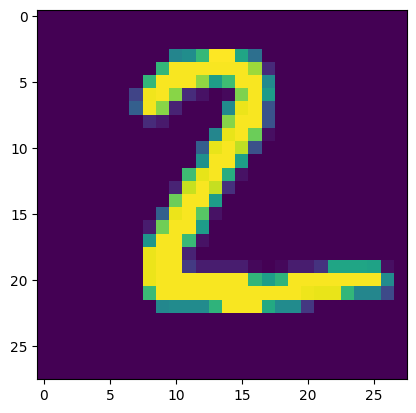

In [35]:
plt.imshow(x_test[0,:])
print(y_test[0])

In [36]:
x_test=x_test.reshape(len(x_test),1,28,28)
x_test=x_test.astype(np.float32)
test_x=torch.from_numpy(x_test)
test_y=torch.from_numpy(y_test)

In [37]:
test_x=test_x/255.0

In [38]:
test_x=test_x.cuda()
test_y=test_y.cuda()

In [39]:
y_result=model(test_x)


In [40]:
y_result.shape

torch.Size([9999, 10])

In [41]:
for i in range(len(y_result)):
  for j in range(10):
    if y_result[i,j]<0.5:
      y_result[i,j]=0
    elif y_result[i,j]>0.5:
      y_result[i,j]=1
      

In [42]:
y_final=np.zeros(9999)
for i in range(len(y_result)):
  for j in range (10):
    if y_result[i,j]==1:
      y_final[i]=j
      

In [43]:
y_final.shape

(9999,)

In [44]:
y_final=np.array(y_final)

In [45]:
y_final=torch.from_numpy(y_final)

***Accuracy test***

In [47]:
from sklearn.metrics import accuracy_score

accuracy_score(y_final,y_test)

0.9000900090009001